### Predicting if a person would buy life insurnace based on his age using logistic regression and Logistic Regression: Multiclass Classification


Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.DataFrame({"age":[22,25,47,52,46,56,55,60,62,61,18,28,27,29,49],
                  "insurance":[0,0,1,0,1,1,0,1,1,1,0,0,0,0,1]})
df

,age,insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


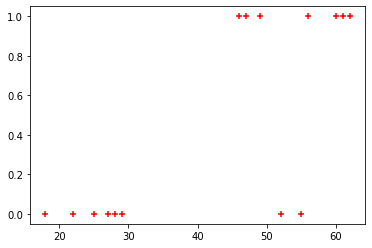

In [3]:
plt.scatter(df.age,df.insurance,marker ="+",color="red")

### Linear Regression is not good for this data set. Instead use logistic regression.
First testing and training the data using sklearn:
First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.

In [68]:
#Testing and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[["age"]],df[["insurance"]],train_size = 0.80)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\gokay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [70]:
x_test

,age
12,27
0,22
6,55


In [71]:
y_predicted = model.predict(x_test)  
y_predicted

array([0, 0, 1], dtype=int64)

In [72]:
model.predict_proba(x_test)

array([[0.95980031, 0.04019969],
       [0.98490942, 0.01509058],
       [0.07881435, 0.92118565]])

In [73]:
model.score(x_test, y_test)

0.6666666666666666

### model.coef_ indicates value of m in y=m*x + b equation

In [10]:
a, b= model.coef_, model.intercept_
a,b

(array([[0.46854989]]), array([-17.41163759]))

In [74]:
#Sigmoid function definition
import math
def sigmoid(x):
    return 1/ (1+ math.exp(-x))

In [79]:
def prediction_function(age):
    z = a*age + b 
    y = sigmoid(z)
    return y

### 0.104 is less than 0.5 which means person with 37 age will not buy insurance



In [80]:
age = 37
prediction_function(age)

0.4811859378743676

In [81]:
age = 38
prediction_function(age)

0.5970667714187538

### 0.300 is more than 0.5 which means person with 43 will buy the insurance


In [82]:
age =43
prediction_function(age)

0.9391182257719461

### Logistic Regression: Multiclass Classification

In [83]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

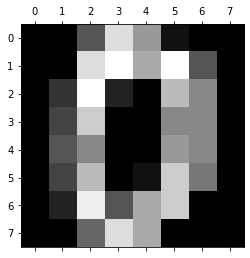

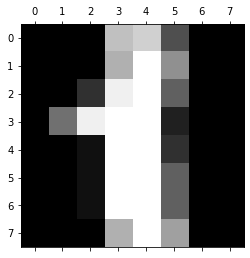

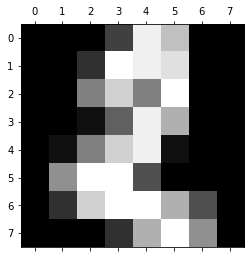

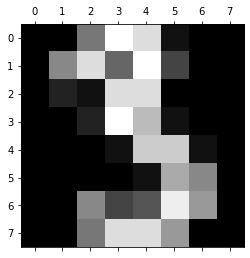

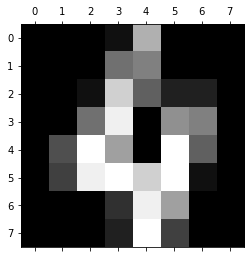

In [84]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [85]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [88]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [89]:
#Create and train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
model.fit(x_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C:\Users\gokay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [90]:
#Measure accuracy of our model
model.score(x_test,y_test)

0.975

In [91]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

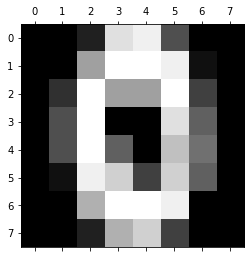

In [96]:
 plt.matshow(digits.images[55])

In [94]:
digits.target[55]

0

In [25]:
#Confusion Matrix
#This matrix shows the real value and we get how our model confused
y_predicted = model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 30,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 37,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 35]], dtype=int64)

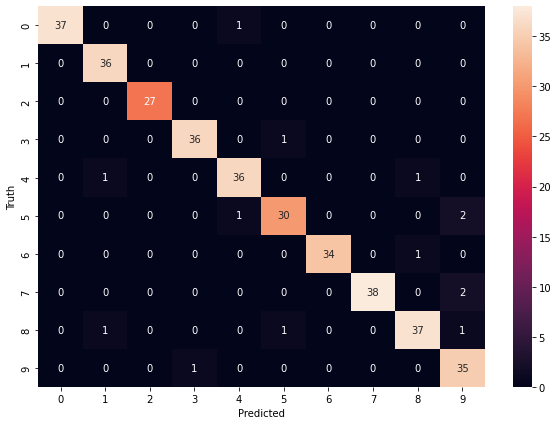

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
#So 36 times the real value of 1 is predicted a 1 and only 1 times it is predicted as 3

### Exercise for a Logistic Regression
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    Plot bar charts showing impact of employee salaries on retention
    Plot bar charts showing corelation between department and employee retention
    Now build logistic regression model using variables that were narrowed down in step 1
    Measure the accuracy of the model


In [99]:
df11 = pd.read_csv("HR_comma_sep.csv")
df11.head(),df11.shape

(   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
 0                0.38             0.53               2                   157   
 1                0.80             0.86               5                   262   
 2                0.11             0.88               7                   272   
 3                0.72             0.87               5                   223   
 4                0.37             0.52               2                   159   
 
    time_spend_company  Work_accident  left  promotion_last_5years Department  \
 0                   3              0     1                      0      sales   
 1                   6              0     1                      0      sales   
 2                   4              0     1                      0      sales   
 3                   5              0     1                      0      sales   
 4                   3              0     1                      0      sales   
 
    salary  
 0     low 

### Data exploration and visualization

In [100]:
left = df11[df11.left== 1]
left.shape

(3571, 10)

In [101]:
#Average numbers for all columns
df11.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### 

From above table we can draw following conclusions,

    **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
    **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
    **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

Impact of salary on employee retention


<AxesSubplot:xlabel='salary'>

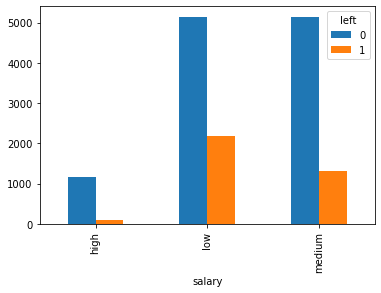

In [31]:
pd.crosstab(df11.salary,df11.left).plot(kind="bar")



Above bar chart shows employees with high salaries are likely to not leave the company

### Department wise employee retention rate


<AxesSubplot:xlabel='Department'>

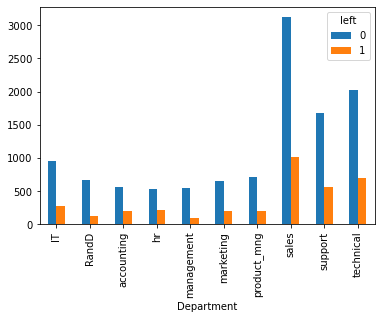

In [32]:
pd.crosstab(df11.Department, df11.left).plot(kind="bar")



From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis
### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

    **Satisfaction Level**
    **Average Monthly Hours**
    **Promotion Last 5 Years**
    **Salary**



In [33]:
subdf = df11[["satisfaction_level", "average_montly_hours","promotion_last_5years","salary"]]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.


In [102]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf, salary_dummies], axis="columns")
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


### Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it


In [103]:
df_with_dummies = df_with_dummies.drop("salary", axis="columns")
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [107]:
x = df_with_dummies
y = df11.left
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size = 0.8)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
model.score(x_test,y_test)

0.7803333333333333